Reference : https://idiotdeveloper.com/read-3d-nifti-images-in-python3/

#### Import Necessary Libraries:

In [8]:
import nibabel as nib
import os
import numpy as np
import matplotlib.pyplot as plt
from nibabel.testing import data_path
import cv2

#### Loading CTA image 

In [18]:
data = nib.load("/Users/yaswanth/Hackathon/Proxmed_LPU/Data/Anon1/Anon1.nii.gz")

In [21]:
print(data.shape)

(512, 512, 662)


In [22]:
print(data.get_data_dtype() == np.dtype(np.int16))
print(data.get_data_dtype())

True
int16


In [23]:
data.affine.shape

(4, 4)

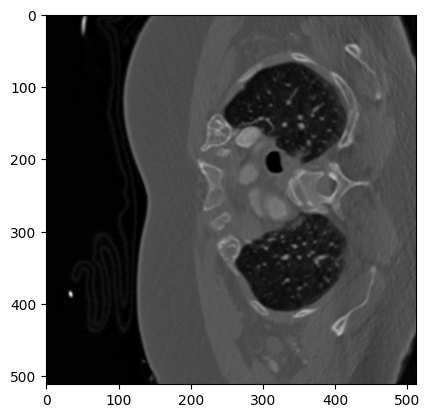

In [31]:
plt.imshow(data.get_fdata()[:, :, 90], cmap='gray')
plt.show()

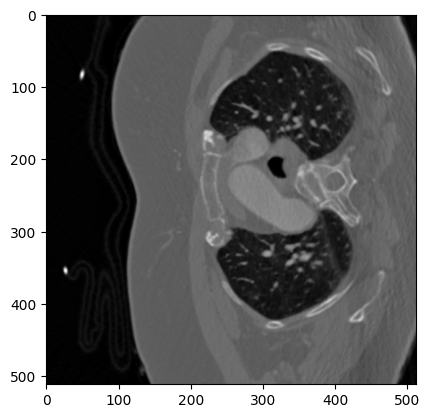

In [42]:
plt.imshow(data.get_fdata()[:, :, 60], cmap='Greys_r')
plt.show()

In [77]:
# Get the image data as a NumPy array
# image_data =data.get_fdata()

In [78]:
# Save each slice as a JPEG file

# for i in range(image_data.shape[2]):
#     slice_data = image_data[:, :, i]
#     slice_data = cv2.normalize(slice_data, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
#     cv2.imwrite(f"Data/Anon1/imgs/slice_{i}.jpg", slice_data)

#### Loading Mask Images

In [90]:
nii_mack_file_path = "/Users/yaswanth/Hackathon/Proxmed_LPU/Data/Anon10/Anon10_ROI.nii.gz"
nii_mask_image = nib.load(nii_file_path)
nii_mask_data = nii_image.get_fdata()

In [91]:
axial_mip = np.max(nii_mask_data, axis=2)
coronal_mip = np.max(nii_mask_data, axis=1)
sagittal_mip = np.max(nii_mask_data, axis=0)

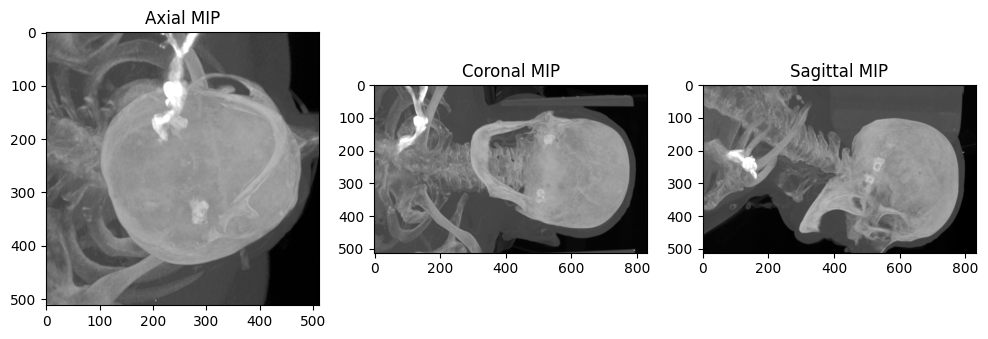

In [92]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(axial_mip, cmap='gray')
plt.title('Axial MIP')

plt.subplot(1, 3, 2)
plt.imshow(coronal_mip, cmap='gray')
plt.title('Coronal MIP')

plt.subplot(1, 3, 3)
plt.imshow(sagittal_mip, cmap='gray')
plt.title('Sagittal MIP')

plt.tight_layout()
plt.show()


#### Load the 3D Brain CTA NIfTI File and Brain Mask:

In [109]:
nii_file_path = "/Users/yaswanth/Hackathon/Proxmed_LPU/Data/Anon10/Anon10.nii.gz"
nii_mask_path = "/Users/yaswanth/Hackathon/Proxmed_LPU/Data/Anon10/Anon10_ROI.nii.gz"

nii_image = nib.load(nii_file_path)
nii_data = nii_image.get_fdata()

nii_mask = nib.load(nii_mask_path)
mask_data = nii_mask.get_fdata()


#### Apply Brain Mask to the CTA Data:

In [110]:
brain_cta_data = nii_data * mask_data

#### Create MIP Images from the Masked Data:

In [111]:
axial_mip = np.max(brain_cta_data, axis=2)
coronal_mip = np.max(brain_cta_data, axis=1)
sagittal_mip = np.max(brain_cta_data, axis=0)

#### Display MIP Images:

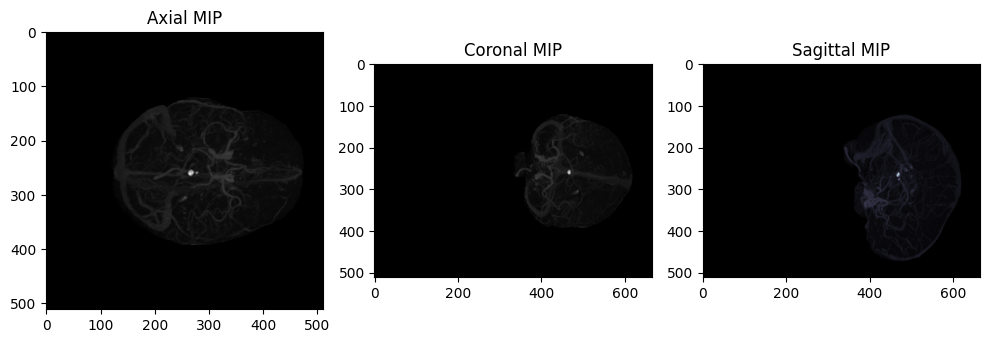

In [119]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(axial_mip, cmap='gray')
plt.title('Axial MIP')

plt.subplot(1, 3, 2)
plt.imshow(coronal_mip, cmap='gray')
plt.title('Coronal MIP')

plt.subplot(1, 3, 3)
plt.imshow(sagittal_mip, cmap='bone')
plt.title('Sagittal MIP')

plt.tight_layout()
plt.show()


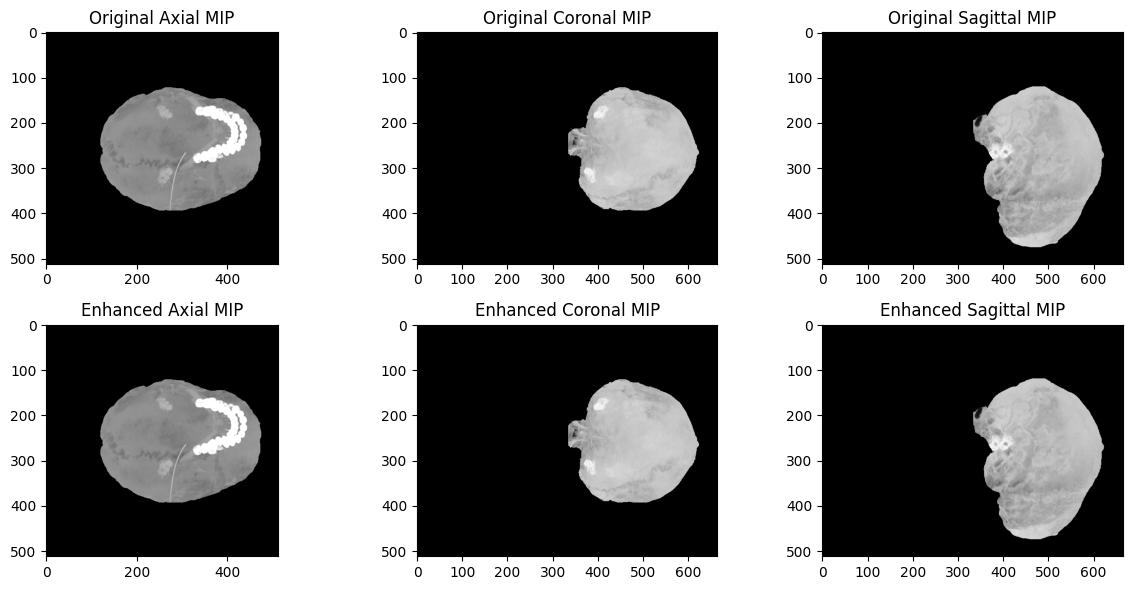

In [106]:
# Load the 3D CTA NIfTI file and brain mask
cta_file_path = "/Users/yaswanth/Hackathon/Proxmed_LPU/Data/Anon10/Anon10.nii.gz"
mask_file_path = "/Users/yaswanth/Hackathon/Proxmed_LPU/Data/Anon10/Anon10_ROI.nii.gz"

cta_image = nib.load(cta_file_path)
cta_data = cta_image.get_fdata()

mask_image = nib.load(mask_file_path)
mask_data = mask_image.get_fdata()

# Apply Maximum Intensity Projection (MIP) along each axis
axial_mip = np.max(cta_data, axis=2)
coronal_mip = np.max(cta_data, axis=1)
sagittal_mip = np.max(cta_data, axis=0)

# Apply the brain mask to the MIPs
axial_mip_masked = axial_mip * mask_data.max(axis=2)
coronal_mip_masked = coronal_mip * mask_data.max(axis=1)
sagittal_mip_masked = sagittal_mip * mask_data.max(axis=0)

# Enhance the masked MIP images using histogram equalization

def enhance_image(image):
    return np.interp(image, (image.min(), image.max()), (0, 255))

enhanced_axial_mip = enhance_image(axial_mip_masked).astype(np.uint8)
enhanced_coronal_mip = enhance_image(coronal_mip_masked).astype(np.uint8)
enhanced_sagittal_mip = enhance_image(sagittal_mip_masked).astype(np.uint8)

# Display the original and enhanced MIP images side by side
plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.imshow(axial_mip_masked, cmap='gray')
plt.title('Original Axial MIP')

plt.subplot(2, 3, 2)
plt.imshow(coronal_mip_masked, cmap='gray')
plt.title('Original Coronal MIP')

plt.subplot(2, 3, 3)
plt.imshow(sagittal_mip_masked, cmap='gray')
plt.title('Original Sagittal MIP')

plt.subplot(2, 3, 4)
plt.imshow(enhanced_axial_mip, cmap='gray')
plt.title('Enhanced Axial MIP')

plt.subplot(2, 3, 5)
plt.imshow(enhanced_coronal_mip, cmap='gray')
plt.title('Enhanced Coronal MIP')

plt.subplot(2, 3, 6)
plt.imshow(enhanced_sagittal_mip, cmap='gray')
plt.title('Enhanced Sagittal MIP')


plt.tight_layout()
plt.show()
